# Практическое задание 2 (часть 1)

# Определение частей речи с помощью скрытой марковской модели

## курс "Математические методы анализа текстов"


### ФИО: Хуршудов Артем Эрнестович

## Введение

### Постановка задачи

В данной лабораторной работе вам предстоит обучить скрытую марковскую модель на размеченных данных и реализовать алгоритм Витерби для задачи POS-теггинга (определение частей речи слов в тексте), а также ознакомиться с использованием  ряда POS-теггеров из библиотеки NLTK.

### Комментарии и советы

1. Для выполнения потребуются модули Python numpy, nltk.

2. Все необходимые для выполнения задания данные либо приложены, либо могут быть скачаны с помощью nltk.download().

3. Посмотреть параметры конструктора и других методов классов можно набрав и выполнив в ячейке с кодом '?full_method_name'.

### Задача определения частей речи (POS)

Мы будем решать задачу определения частей речи (POS-теггинга) с помощью скрытой марковской модели (HMM). Формула совместной плотности наблюдаемых и скрытых переменных задается как

$$ p(x, t) = p(t) p(x|t) = p(t_1)  \prod_{i=2}^{N_x} p(t_i|t_{i-1}) \prod_{i=1}^{N_x} p(x_i|t_i)$$

#### Переменные модели

- наблюдаемые переменные $X$ - словарь корпуса;

- скрытые переменные $T$ - множество POS-тегов.

- x - одно предложение, $N_x$ - длина предложения

- t - теги одного предложения, $N_t$ - длина вектора меток

#### Параметры модели

- матрица вероятностей переходов $A \in \mathbb{R}^{|T| \times |T|}$, $A_{ij} = p(t_s=i|t_{s-1}=j) \; \forall s$

- матрица выходных вероятностей $B \in \mathbb{R}^{|X| \times |T|}$, $B_{ij} = p(x_s =i|t_s =j) \; \forall s$

- вектор начальных вероятностей $C \in \mathbb{R}^{|T|}$, $C_i = p(t_1=i)$


#### Обучение модели

* Для обучения параметров $A$ и $B$ используется метод максимума правдоподобия. Оценки вычисляются на основе частот совстречаемости тегов и тегов со словами ():

$$a_{ij} = \frac{\sum_{t}\sum_{s=2}^{N_t} \mathbb{I}[t_{s} = i, t_{s - 1} = j]}{\sum_{t}\sum_{s=2}^{N_t} \mathbb{I}[t_{s} = j]}$$

$$b_{ij} = \frac{\sum_{t, x}\sum_{s=1}^{N_t} \mathbb{I}[x_{s} = i, t_{s} = j]}{\sum_{t, x}\sum_{s=1}^{N_t} \mathbb{I}[t_{s} = j]}$$

* Параметры $C$ можно аналогично вычислять по частотам или считать распределение $p(t_1)$ равномерным

#### Применение модели

Применение модели на новых данных реализуется с помощью алгоритма Витерби.Это алгоритм динамиеского программирования, с помощью которого мы будем находить наиболее вероятную последовательность скрытых состояний модели для фиксированной последовательности слов:

$$ \hat{t} = \arg \max_{t} p(t|x) = \arg \max_{t} p(x, t) $$

Определим функцию, определяющую максимальную вероятность последовательности, заканчивающейся на $i$-ой позиции в состоянии $k$:

$$\delta(k, i) = \max_{t_1, \dots t_{i-1}} p(x_1, \dots x_i, t_1, \dots t_i=k)$$

Тогда $\max_{k} \delta(k, N_x)$ - максимальная вероятность всей последовательности. А состояния, на которых эта вероятность достигается - ответ задачи.

Алгоритм Витерби заключается в последовательном пересчете функции $\delta(k, i)$ по формуле:

$$\delta(k, i) = \max_{m} \delta(m, i-1) p(t_i = k|t_{i-1} = m) p(x_i|t_i=k) $$

Аналогично пересчитывается функция, определяющая, на каком состоянии этот максимум достигается:

$$s(k, i) = \arg \max_{m} \delta(m, i-1) p(t_i = k|t_{i-1} = m) p(x_i|t_i=k) $$


На практике это означает заполнение двумерных массивов размерности: (длина последовательности) $\times$ (количество возможных состояний). Когда массивы заполнены, $\arg \max_{k} \delta(k, N_x)$ говорит о последнем состоянии. Начиная с него можно восстановить все состояния по массиву $s$. 

Осталось уточнить, как стартовать последовательный пересчет (чем заполнить первый столбец массива вероятностей):

$$\delta(k, 1) = p(k) p(x_1|t_1=k)$$

Подробнее о HMM можно прочитать по [ссылке](https://web.stanford.edu/~jurafsky/slp3/A.pdf)

## Часть 1. Загрузка корпуса (1 балл)

Загрузите brown корпус с универсальной системой тегирования. Для этого вам понадобятся ресурсы brown и universal_tagset из nltk.download().  

Так как каждый конкретный датасет может использовать свою систему тегов, в NLTK предусмотрено универсальное множество тегов и возможность приведения к нему других систем. Это множество включает в себя следующие теги:


- ADJ - adjective (new, good, high, ...)
- ADP - adposition	(on, of, at, ...)
- ADV - adverb	(really, already, still, ...)
- CONJ	- conjunction	(and, or, but, ...)
- DET - determiner, article	(the, a, some, ...)
- NOUN	- noun	(year, home, costs, ...)
- NUM - numeral	(twenty-four, fourth, 1991, ...)
- PRT -	particle (at, on, out, ...)
- PRON - pronoun (he, their, her, ...)
- VERB - verb (is, say, told, ...)
- .	- punctuation marks	(. , ;)
- X	- other	(ersatz, esprit, dunno, ...)

Обратите внимание, что тегсеты в корпусах текстов и в различных теггерах могут быть разными. Проверять это можно, глядя на сами теги, а симптом - подозрительно низкое качество теггирования. В таких случаях рекомендуется всё приводить сперва к универсальному тегсету, а потом уже мерять качество. Полезной может оказаться эта ссылка http://www.nltk.org/_modules/nltk/tag/mapping.html

In [0]:
import nltk
import numpy as np
nltk.download('brown')
nltk.download('universal_tagset')

from nltk.corpus import brown

brown_tagged_sents = brown.tagged_sents(tagset="universal")

print(brown_tagged_sents[1])

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('of', 'ADP'), ('Atlanta', 'NOUN'), ("''", '.'), ('for', 'ADP'), ('the', 'DET'), ('manner', 'NOUN'), ('in', 'ADP'), ('which', 'DET'), ('the', 'DET'), ('election', 'NOUN'), ('was', 'VERB'), ('conducted', 'VERB'), ('.', '.')]


Проанализируйте данные, с которыми Вы работаете. В частности, ответьте на вопросы:
- Каков общий объем датасета, формат?
- Приведены ли слова к нижнему регистру? Чем  это нам может в дальнейшем помешать?
- Как распределены слова в корпусе?  Как распределены теги в корпусе? Подсчитайте частоты и отобразите любым удобным для Вас способом. Проинтерпретируйте полученные результаты.

In [0]:
print("В датасете %d предложений, %d слов" % (len(brown_tagged_sents), sum(map(len, brown_tagged_sents))))
print("Слова не приведены к нижнему регистру. Это может нам помешать приводить слова к векторам, но с другой стороны это дает нам дополнительные признаки")

В датасете 57340 предложений, 1161192 слов
Слова не приведены к нижнему регистру. Это может нам помешать приводить слова к векторам, но с другой стороны это дает нам дополнительные признаки


In [0]:
from collections import Counter

tags_arr = [inner[1]
              for outer in brown_tagged_sents
                for inner in outer]

tags_cnt = Counter(tags_arr)
tags_freq = [(el, tags_cnt[el]/len(tags_arr))  for el in tags_cnt]
sorted(tags_freq, key=lambda x:x[1], reverse=True)

[('NOUN', 0.23730614747604187),
 ('VERB', 0.15738138051243894),
 ('.', 0.12708062060365555),
 ('ADP', 0.12467016651854301),
 ('DET', 0.11799857387925511),
 ('ADJ', 0.0720991877312279),
 ('ADV', 0.048432128364645985),
 ('PRON', 0.04248565267414863),
 ('CONJ', 0.03285503172601947),
 ('PRT', 0.02568825827253374),
 ('NUM', 0.01280925118326685),
 ('X', 0.0011936010582229296)]

In [0]:
from collections import Counter

words_arr = [inner[0]
              for outer in brown_tagged_sents
                for inner in outer]

words_cnt = Counter(words_arr)
words_freq = [(el, words_cnt[el]/len(words_arr))  for el in words_cnt]
print("top10 most frequent words")
sorted(words_freq, key=lambda x:x[1], reverse=True)[:10]

top10 most frequent words


[('the', 0.05400743374050114),
 (',', 0.050236308896375446),
 ('.', 0.042495986882444936),
 ('of', 0.03107151961088261),
 ('and', 0.024039952049273505),
 ('to', 0.022159987323371155),
 ('a', 0.01884356764428277),
 ('in', 0.01682409110638034),
 ('that', 0.008815940860770656),
 ('is', 0.008621313271190294)]

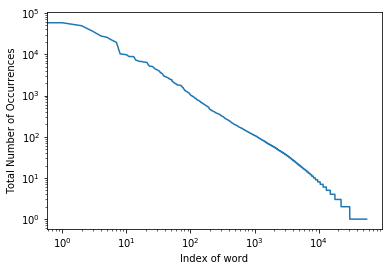

In [0]:
import matplotlib.pyplot as plt

plt.ylabel("Total Number of Occurrences")
plt.xlabel("Index of word")
plt.loglog(
    range(len(words_cnt)),
    sorted([words_cnt[el]  for el in words_cnt], reverse=True),
  )


Cделайте случайное разбиение выборки на обучение и контроль в отношении 9:1.Если впоследствии обучение моделей будет занимать слишком много времени, работайте с подвыборкой, например, только текстами определенных категорий.

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(brown_tagged_sents, train_size=0.9)
print(len(train), len(test))

51606 5734


## Часть 2. Скрытая марковская модель (4 балла) 

### Метод максимального правдоподобия для обучения модели

Требуется построить скрытую марковскую модель (class HiddenMarkovModel) и написать метод fit для настройки всех её параметров с помощью оценок максимального правдоподобия по размеченным данным (последовательности пар слово+тег):

- Вероятности переходов между скрытыми состояниями $p(t_i | t_{i - 1})$ посчитайте на основе частот биграмм POS-тегов.

- Вероятности эмиссий наблюдаемых состояний $p(x_i | t_i)$ посчитайте на основе частот "POS-тег - слово".

- Обратите внимание на проблему разреженности счетчиков и сделаейте все вероятности сглаженными по Лапласу ([add-k smoothing](https://en.wikipedia.org/wiki/Additive_smoothing)).

- Распределение вероятностей начальных состояний $p(t_1)$ задайте равномерным.


### Алгоритм Витерби для применения модели

Требуется написать метод .predict для определения частей речи на тестовой выборке. Чтобы использовать обученную модель на новых данных, необходимо реализовать алгоритм Витерби. 

В реализации рекомендуется перейти к логарифмам, т.к. произведение большого числа маленьких вероятностей может приводить к вычислительным ошибкам.

In [0]:
class HiddenMarkovModel:    
    def __init__(self, k_smoothing=1.0):
        """
        k_smoothing : float, constant in add-k-smoothing
        """
        self.k_smoothing = k_smoothing
        
    def fit(self, train_tokens_tags_list):
        """
        Fit the model using maximum likelihood method.
        
        train_tokens_tags_list: list of list of pairs (token, tag) 
        """
        # A = |T|x|T|
        tags_arr = [inner[1]
              for outer in brown_tagged_sents
                for inner in outer]
        self.tags_set = set(tags_arr)

        self.A = np.array([[0 for _ in range(len(self.tags_set))] for _ in range(len(self.tags_set))])

        self.tag_to_idx = {}
        self.idx_to_tag = {}
        for idx, el in enumerate(self.tags_set):
          self.tag_to_idx[el] = idx
          self.idx_to_tag[idx] = el


        # B = |X|x|T|
        words_arr = [inner[0].lower()
              for outer in brown_tagged_sents
                for inner in outer]
        self.words_set = set(words_arr)
        self.B = np.array([[0 for _ in range(len(self.tags_set))] for _ in range(len(self.words_set))])

        self.word_to_idx = {}
        self.idx_to_word = {}
        for idx, el in enumerate(self.words_set):
          self.word_to_idx[el] = idx
          self.idx_to_word[idx] = el

        for sent in train_tokens_tags_list:
          for i in range(len(sent)):
            cur_tag = sent[i][1]
            cur_word = sent[i][0].lower()
            if i >= 1:
              prev_tag = sent[i-1][1]
              self.A[self.tag_to_idx[cur_tag]][self.tag_to_idx[prev_tag]] += 1
            self.B[self.word_to_idx[cur_word]][self.tag_to_idx[cur_tag]] += 1

        self.B = self.B + self.k_smoothing
        self.B = self.B / self.B.sum(axis=1)[:,None]
        self.A = self.A / self.A.sum(axis=1)[:,None]
        self.B[np.isnan(self.B)] = 0
        
    
    def predict(self, test_tokens_list):
        """
        Return predictions for test_tokens_list using viterbi algorithm.
        
        test_tokens_list : list of list of tokens
        
        return: list of list of tags
        """
        all_tags = []
        for sent in test_tokens_list:
          tags = []

          prev_probs = [0] * len(self.tags_set)
          for el in self.idx_to_tag:
            prev_probs[el] += self.B[self.word_to_idx[sent[0].lower()]][el]
            first_tag = self.idx_to_tag[np.argmax(prev_probs)]

          tags.append(np.argmax(prev_probs))

          for idx in range(1, len(sent)):
            cur_probs = [0] * len(self.tags_set)
            for k in self.idx_to_tag:
              tmp_arr = []
              for m in self.idx_to_tag:
                tmp = np.log((prev_probs[m])) + \
                      np.log((self.A[k][m])) + \
                      np.log((self.B[self.word_to_idx[sent[idx].lower()]][k]))
                tmp_arr.append(tmp)
              cur_probs[k] = max(tmp_arr)
            tags.append(np.argmax(cur_probs))
          prev_probs = np.copy(cur_probs)

          all_tags.append([self.idx_to_tag[el] for el in tags])
          
        return all_tags

Обучите скрытую марковскую модель:

In [0]:
%%time
hmm = HiddenMarkovModel(0.05)
hmm.fit(train)

CPU times: user 9.97 s, sys: 276 ms, total: 10.3 s
Wall time: 10.3 s


Проверьте работу реализованного алгоритма на следующих модельных примерах, проинтерпретируйте результат.

- 'he can stay'
- 'a milk can'
- 'i saw a dog'
- 'an old saw'

In [0]:
hmm.predict([
    ['he', 'can', 'stay'],
    ['a', 'milk', 'can'],
    ['i', 'saw', 'a', 'dog'],
    ['an', 'old', 'saw']
])

[['PRON', 'VERB', 'VERB'],
 ['DET', 'NOUN', 'VERB'],
 ['PRON', 'VERB', 'DET', 'NOUN'],
 ['DET', 'ADJ', 'VERB']]

Примените модель к отложенной выборке Брауновского корпуса и подсчитайте точность определения тегов (accuracy). Сделайте выводы. 

In [0]:
%%time

test_X = []
test_y = []

for sent in test:
  test_X.append([el[0] for el in sent])
  test_y.append([el[1] for el in sent])
  
pred_y = hmm.predict(test_X)

CPU times: user 1min 26s, sys: 148 ms, total: 1min 26s
Wall time: 1min 26s


In [0]:
pred_y = np.array([item for sublist in pred_y for item in sublist])
test_y = np.array([item for sublist in test_y for item in sublist])
print(sum(pred_y == test_y) / len(pred_y))

0.9191163830153


In [0]:
# without smoothing 
0.9136579603169812
# with smoothing 1.0
0.8802266122843173
# with smoothing 0.1
0.9133820245065492
# with smoothing 
0.9192321653903994

## Бонусная часть. Сравнение с готовыми POS-теггерами из NLTK (2 балла)

В прошлом пункте Вы реализовали свой POS-тегер на основе скрытой марковской модели. Теперь сравните его работу с готовыми средставми, доступными в библиотеке NLTK: http://www.nltk.org/api/nltk.tag.html

Сравните с вашей моделью любые из 4-х теггеров, представленных ниже.

При проведении экспериментов обращайте внимание на следующие моменты (и отразите их в отчете):
- Какой подход лежит в основе теггера
- На каких данных он обучен (если Вы скачали готовую модель)
- Сколько времени занимает обучение на brown корпусе (если обучаете сами)
- Какая точность получается на контролькой выборке

Сформируйте рекоммендиции о том, какую технологию Вы бы использовали, если встретитесь с задачей определения частей речи в будущем.

In [0]:
import nltk
from nltk.tag.mapping import map_tag

### 1. DefaultTagger
Простая заглушка, ставящая всем словам один и тот же pos-тег. Очевидно, для максимизации качества, мы хотим выбрать самую частотную метку из всех меток обучающей выборки, т.е. метку 'NOUN'.

In [0]:
from nltk.tag import DefaultTagger
default_tagger = DefaultTagger(u'NOUN')

print('train:', default_tagger.evaluate(brown_tagged_sents))

train: 0.23730614747604187


### 2. RegexpTagger

Теггер, который присваивает слову часть речи, основываясь на регулярных выражениях. Например, ставить слову метку 'NOUN', если слово кончается на 'ness'. Ниже приведен простой пример возможных правил. В качестве backoff теггера использован DefaultTagger.



In [0]:
from nltk.tag import RegexpTagger

regexp_tagger = RegexpTagger(regexps=[(r'^-?[0-9]+(.[0-9]+)?$', 'CD'),   # cardinal numbers
                                      (r'(The|the|A|a|An|an)$', 'AT'),   # articles
                                      (r'.*able$', 'JJ'),                # adjectives
                                      (r'.*ness$', 'NN'),                # nouns formed from adjectives
                                      (r'.*ly$', 'RB'),                  # adverbs
                                      (r'.*s$', 'NNS'),                  # plural nouns
                                      (r'.*ing$', 'VBG'),                # gerunds
                                      (r'.*ed$', 'VBD'),                 # past tense verbs
                                      (r'.*', 'NN')                      # nouns (default)
                                     ],
                             backoff=default_tagger)

# your code here
# use map_tag() to tranform 'en-ptb' to 'universal' tags.
X = [[el[0] for el in sent] 
     for sent in brown_tagged_sents]

pred_all = regexp_tagger.tag_sents(X)

pred = [map_tag('en-ptb', 'universal', el[1]) for sent in pred_all
        for el in sent]

true = [el[1] for sent in brown_tagged_sents
        for el in sent]

sum([pred[i] == true[i] for i in range(len(true))])/len(true)

0.30036893123617797

### 3. N-грамные теггеры

В теггерах, основанных на n-граммах,  принятие решения происходит в зависимости от $n-1$ предыдущих слов и их тегов. Эти теггеры необходимо обучать по размеченной обучающей коллекции. 

Заметим, что TrigramTagger и BigramTagger работают очень плохо без указания backoff. Поэтому предлагается построить композицию, где 
в качестве backoff для UnigramTagger использовать DefaultTagger, для BigramTagger использовать UnigramTagger, для TrigramTagger  использовать BigramTagger. 

In [0]:
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

u_tagger = UnigramTagger(train, backoff=default_tagger)
print('UnigramTagger')
print('train:', u_tagger.evaluate(train))
print('test:', u_tagger.evaluate(test))

b_tagger = BigramTagger(train, backoff=u_tagger)
print('BigramTagger')
print('train:', b_tagger.evaluate(train))
print('test:', b_tagger.evaluate(test))

t_tagger = TrigramTagger(train, backoff=b_tagger)
print('TrigramTagger')
print('train:', t_tagger.evaluate(train))
print('test:', t_tagger.evaluate(test))

UnigramTagger
train: 0.9571039726200458
test: 0.9461320268179474
BigramTagger
train: 0.9691429982428134
test: 0.9544180849235001
TrigramTagger
train: 0.9728736701465853
test: 0.954039883101255


### 4. Stanford tagger

Скачайте предобученную модель от Стэнфорда: https://nlp.stanford.edu/software/tagger.shtml и примените к тестовым данным. 
Не забудьте преобразовать систему тэгов из 'en-ptb' в 'universal' с помощью функции map_tag.

In [0]:
from nltk.tag.stanford import StanfordPOSTagger

# Add the jar and model via their path:
jar = 'stanford-postagger-3.9.2.jar'
model = 'english-bidirectional-distsim.tagger'
stanford_tagger = StanfordPOSTagger(model, jar, encoding='utf8')

X = [[el[0] for el in sent] 
     for sent in brown_tagged_sents]

pred_all = stanford_tagger.tag_sents(X)

pred = [map_tag('en-ptb', 'universal', el[1]) for sent in pred_all
        for el in sent]

true = [el[1] for sent in brown_tagged_sents
        for el in sent]

sum([pred[i] == true[i] for i in range(len(true))])/len(true)

/usr/local/lib/python3.6/dist-packages/nltk/tag/stanford.py:149: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordPOSTagger, self).__init__(*args, **kwargs)


0.9249745089528691

### 5. Теггеры из NLTK на основе графических моделей

Обучите теггер, основанный на HMM или CRF, на основе класса из nltk.

In [0]:
from nltk.tag import HiddenMarkovModelTagger, CRFTagger

### Сравнение моделей

Сравните различные модели по качеству, сделайте выводы.

In [0]:
# my HMM without smoothing 
0.9136579603169812
# my HMM with smoothing 1.0
0.8802266122843173
# my HMM with smoothing 0.1
0.9133820245065492
# my HMM with smoothing 0.05
0.9191163830153

Очевидно, что это очень "не умный" тегер
# DefaultTagger
0.23730614747604187

Этот тегер чуть умнее, но очевидно, что регулярными выражениями очень сложно отловить все зависимости.
# RegExpTagger
0.30036893123617797

Этот тегер учитывает контекст размером 1, то есть для предсказывания тэга слова используется предыдещее слово.
# UnigramTagger
train: 0.9571039726200458
test: 0.9461320268179474
  
Этот тегер учитывает контекст размером 2, то есть для предсказывания тэга слова используются 2 предыдещих слово.
# BigramTagger
train: 0.9691429982428134
test: 0.9544180849235001
  
Этот тегер учитывает контекст размером 2, то есть для предсказывания тэга слова используются 3 предыдещих слово.
# TrigramTagger
train: 0.9728736701465853
test: 0.954039883101255
  
Так как мы добавили параметр backoff, то при отказе классификации жтим тэгером используется тот, который в указан.
  
Основные идеи: 
  1. явное использование как предшествующего, так и последующего текстовых тегов через сетевое представление зависимостей
  2. широкое использование лексических признаков
  3. эффективное использование логлинейный моделей
  4. детальная обработка неизвестных слов.

# StanfordTagger
0.9249745089528691